# 📈 Apple Stock Price Prediction Using Deep Learning  
## Manual Preprocessing vs End-to-End Pipeline Comparison (RNN, LSTM, GRU)

## 1. Import Required Libraries

In [43]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## 2. Load and Inspect the Dataset

In [44]:
df = pd.read_csv("/kaggle/input/apple-stock-price/apple_stock.csv")

In [45]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  19.845715  19.893929  19.715000  19.754642  17.318729   
1  2014-01-03  19.745001  19.775000  19.301071  19.320715  16.938305   
2  2014-01-06  19.194643  19.528570  19.057142  19.426071  17.030676   
3  2014-01-07  19.440001  19.498571  19.211430  19.287144  16.908880   
4  2014-01-08  19.243214  19.484285  19.238930  19.409286  17.015959   

      Volume  
0  234684800  
1  392467600  
2  412610800  
3  317209200  
4  258529600  


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Open       2475 non-null   float64
 2   High       2475 non-null   float64
 3   Low        2475 non-null   float64
 4   Close      2475 non-null   float64
 5   Adj Close  2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB
None


In [47]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  2475.000000  2475.000000  2475.000000  2475.000000  2475.000000   
mean     76.004968    76.845661    75.213720    76.064199    74.097124   
std      54.739063    55.389713    54.134658    54.787600    55.248195   
min      17.684999    17.911785    17.626785    17.849285    15.648315   
25%      29.592500    29.841249    29.371249    29.707500    27.131330   
50%      47.507500    47.967499    47.267502    47.599998    45.507229   
75%     132.145004   133.680000   130.495003   132.029999   130.403320   
max     196.240005   198.229996   195.279999   196.449997   195.926956   

             Volume  
count  2.475000e+03  
mean   1.380565e+08  
std    8.399674e+07  
min    3.145820e+07  
25%    8.300500e+07  
50%    1.134760e+08  
75%    1.682138e+08  
max    1.065523e+09  


## 3. Check for Missing Values

In [48]:
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## 4. Date Conversion and Sorting

In [49]:
df['Date'] = pd.to_datetime(df['Date'])

In [50]:
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True)

## 5. Apple Stock Close Price Over Time

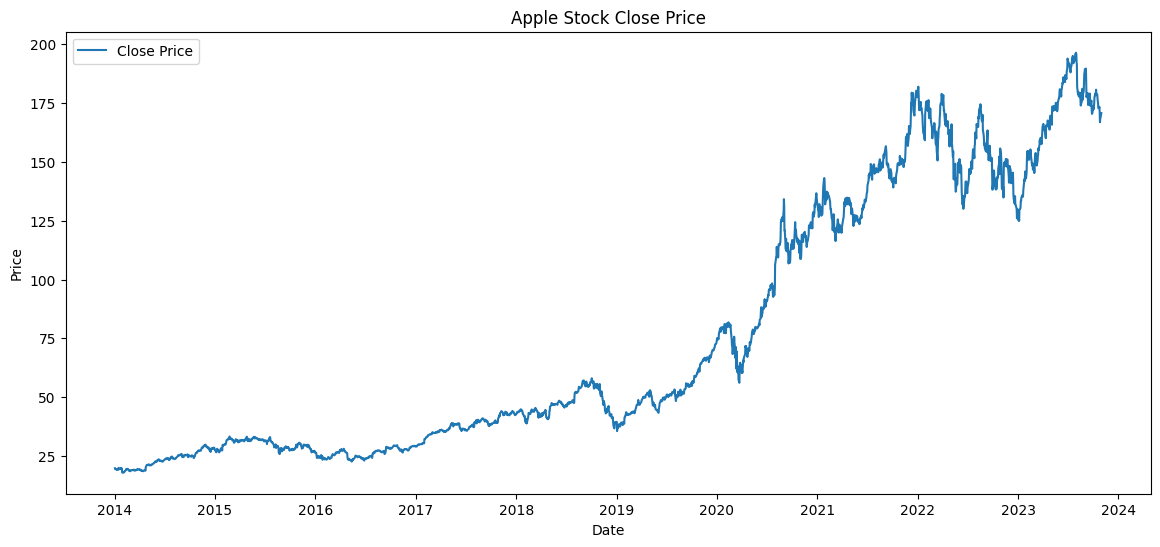

In [51]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("Apple Stock Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## 6. Feature Engineering from Date

In [52]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

In [53]:
df_features = df.drop(columns=['Date'])

In [54]:
df_features.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Weekday
0,19.845715,19.893929,19.715000,19.754642,17.318729,234684800,2014,1,2,3
1,19.745001,19.775000,19.301071,19.320715,16.938305,392467600,2014,1,3,4
2,19.194643,19.528570,19.057142,19.426071,17.030676,412610800,2014,1,6,0
3,19.440001,19.498571,19.211430,19.287144,16.908880,317209200,2014,1,7,1
4,19.243214,19.484285,19.238930,19.409286,17.015959,258529600,2014,1,8,2


## 7. Feature Correlation Analysis

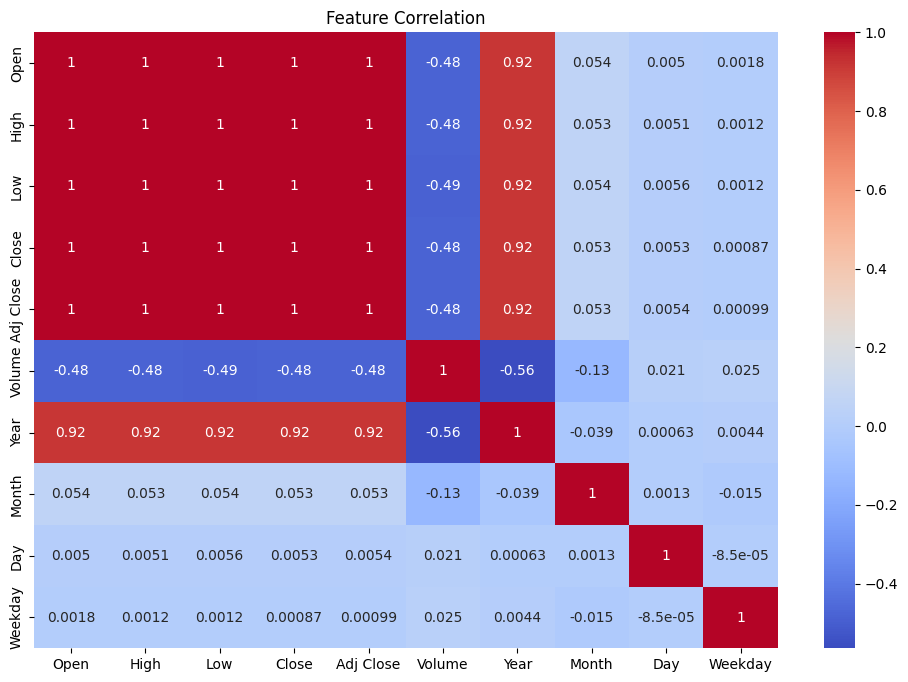

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

## 8. Feature Distribution Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

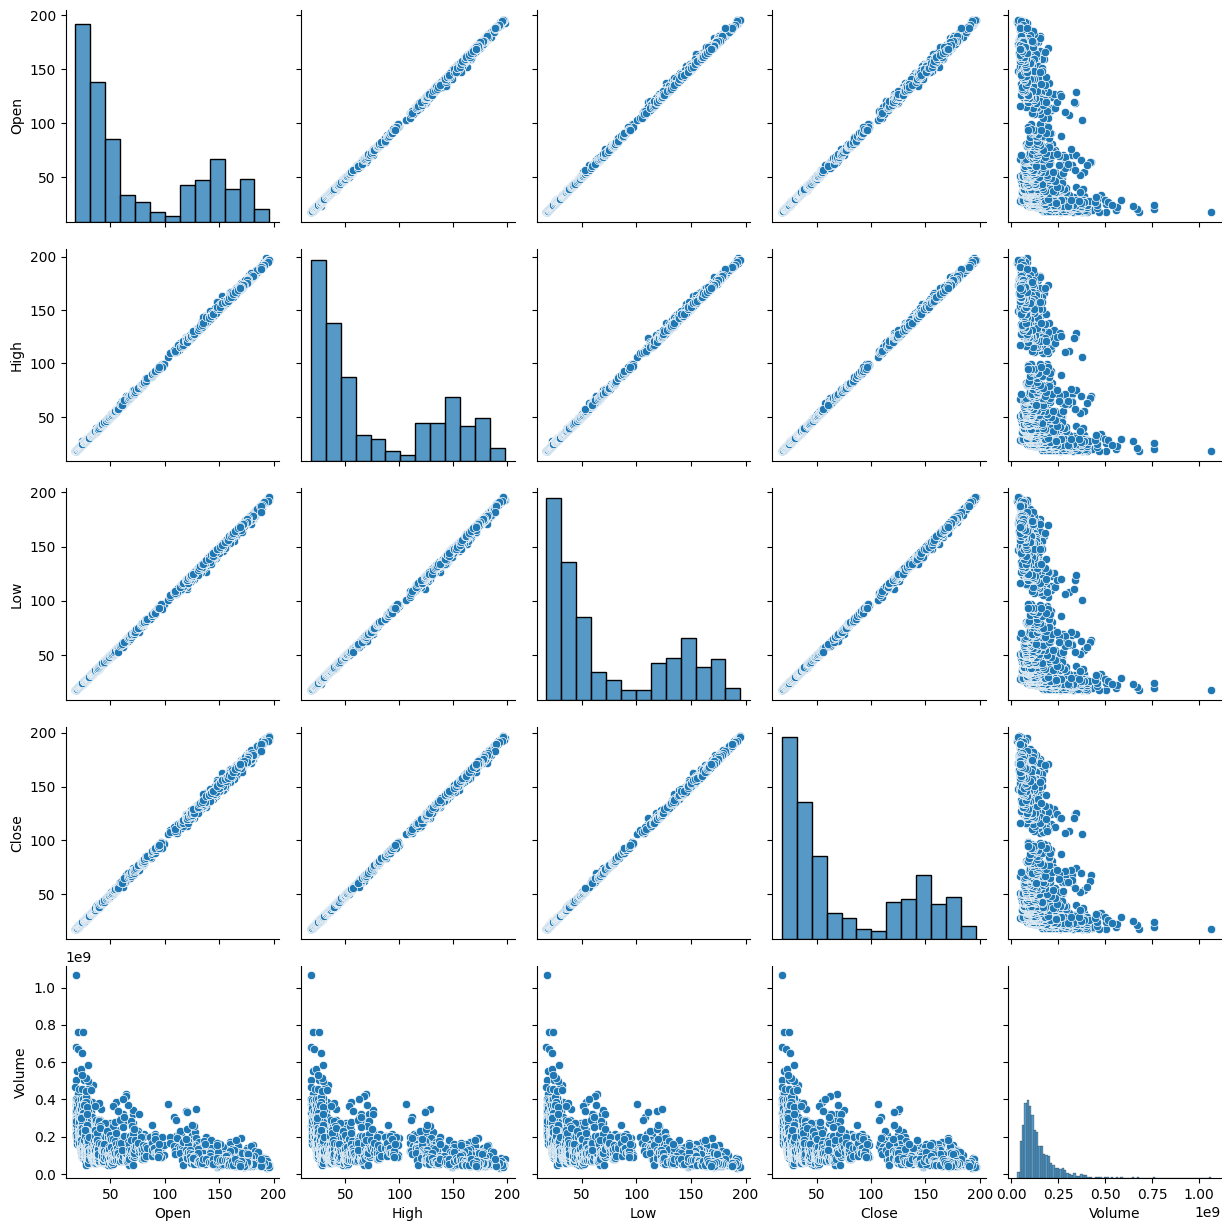

In [56]:
sns.pairplot(df_features[['Open','High','Low','Close','Volume']])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


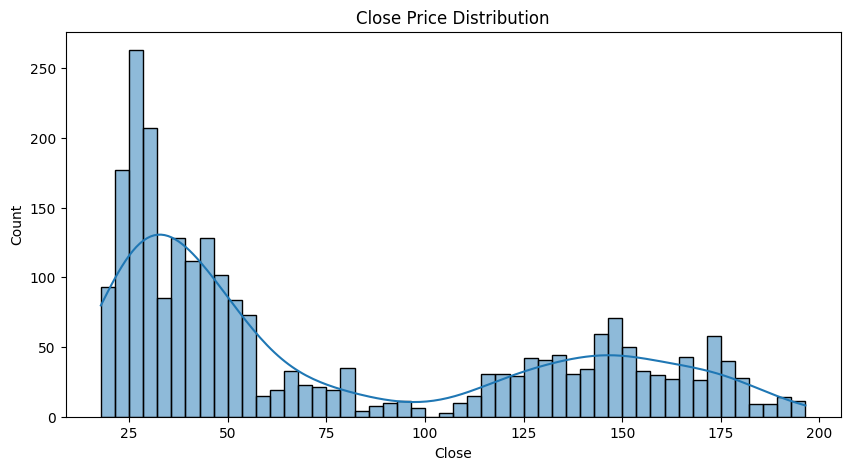

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title("Close Price Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


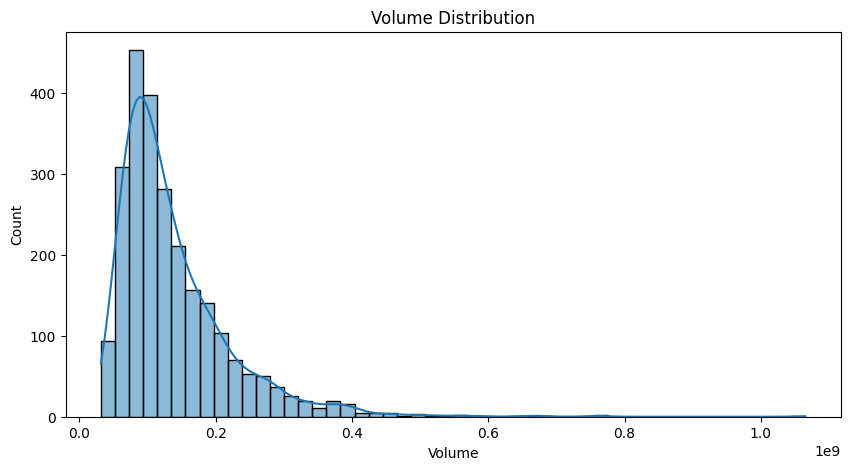

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(df['Volume'], bins=50, kde=True)
plt.title("Volume Distribution")
plt.show()

## 9. Feature Scaling Using MinMaxScaler


In [59]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features)

In [60]:
scaled_df = pd.DataFrame(scaled_data, columns=df_features.columns)

## 10. Time Series Sequence Generation

In [61]:
SEQ_LEN = 60

def create_sequences(data, target_column='Close', seq_len=SEQ_LEN):
    X, y = [], []
    if isinstance(data, np.ndarray):
        if isinstance(target_column, str):
            target_idx = list(scaled_df.columns).index(target_column)
        else:
            target_idx = target_column
    else:
        target_idx = data.columns.get_loc(target_column)
    
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, :])
        y.append(data[i, target_idx])
    return np.array(X), np.array(y)

scaled_data_array = scaled_df.values
X, y = create_sequences(scaled_data_array, target_column='Close', seq_len=SEQ_LEN)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2415, 60, 10)
Shape of y: (2415,)


## 11. Train-Test Split

In [62]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 1932
Testing samples: 483


## 12. Deep Learning Model Builder

In [63]:
def build_model(model_type, input_shape):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(50, return_sequences=False, input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(50, return_sequences=False, input_shape=input_shape))
    elif model_type == 'GRU':
        model.add(GRU(50, return_sequences=False, input_shape=input_shape))
    
    model.add(Dropout(0.2))
    model.add(Dense(1))  # predict Close price
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


## 13. Train Deep Learning Models (Manual Approach)

In [64]:
models = {}
histories = {}
for m in ['RNN','LSTM','GRU']:
    print(f"\nTraining {m} Model...")
    model = build_model(m, (X_train.shape[1], X_train.shape[2]))
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=30,
        batch_size=32,
        callbacks=[es],
        verbose=1
    )
    models[m] = model
    histories[m] = history



Training RNN Model...
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1109 - mae: 0.2531 - val_loss: 0.0339 - val_mae: 0.1596
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0357 - mae: 0.1469 - val_loss: 0.0288 - val_mae: 0.1495
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0221 - mae: 0.1155 - val_loss: 0.0118 - val_mae: 0.0925
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - mae: 0.0936 - val_loss: 0.0153 - val_mae: 0.1115
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0121 - mae: 0.0866 - val_loss: 0.0099 - val_mae: 0.0869
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0097 - mae: 0.0758 - val_loss: 0.0062 - val_mae: 0.0683
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0073 - mae: 0.0674 - val_loss: 0.0022 - val_mae: 0.0378
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0061 - mae: 0.0612 - val_loss: 0.0023 - val_mae: 0.0391
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0050 - mae: 0.

In [65]:
for m in models:
    y_pred = models[m].predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{m} → RMSE: {rmse:.4f}, MAE: {mae:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RNN → RMSE: 0.0690, MAE: 0.0610
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LSTM → RMSE: 0.0632, MAE: 0.0551
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
GRU → RMSE: 0.0259, MAE: 0.0210


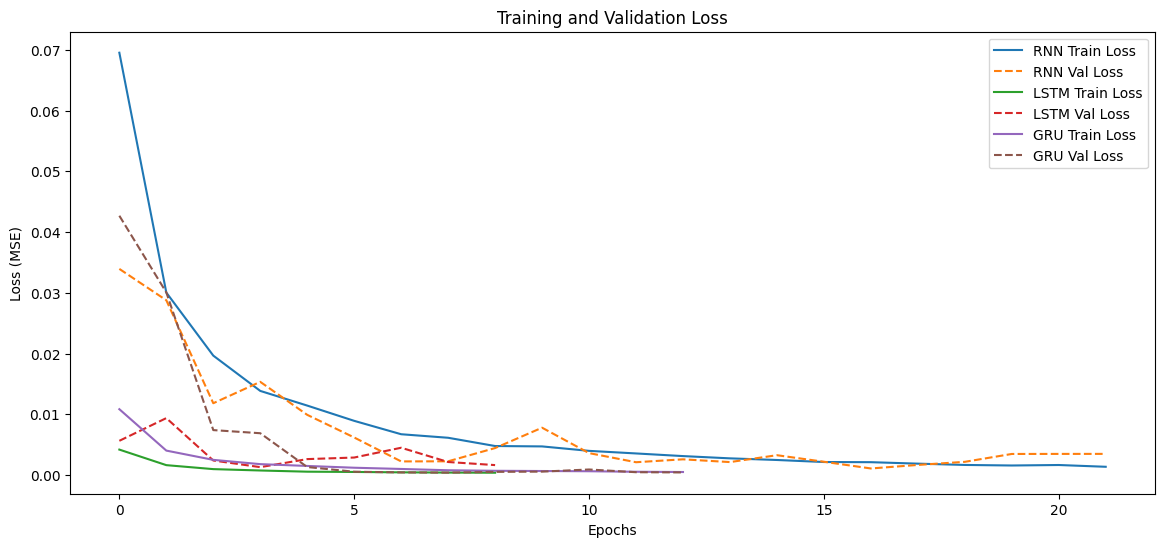

In [66]:
plt.figure(figsize=(14,6))
for m in histories:
    plt.plot(histories[m].history['loss'], label=f'{m} Train Loss')
    plt.plot(histories[m].history['val_loss'], '--', label=f'{m} Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


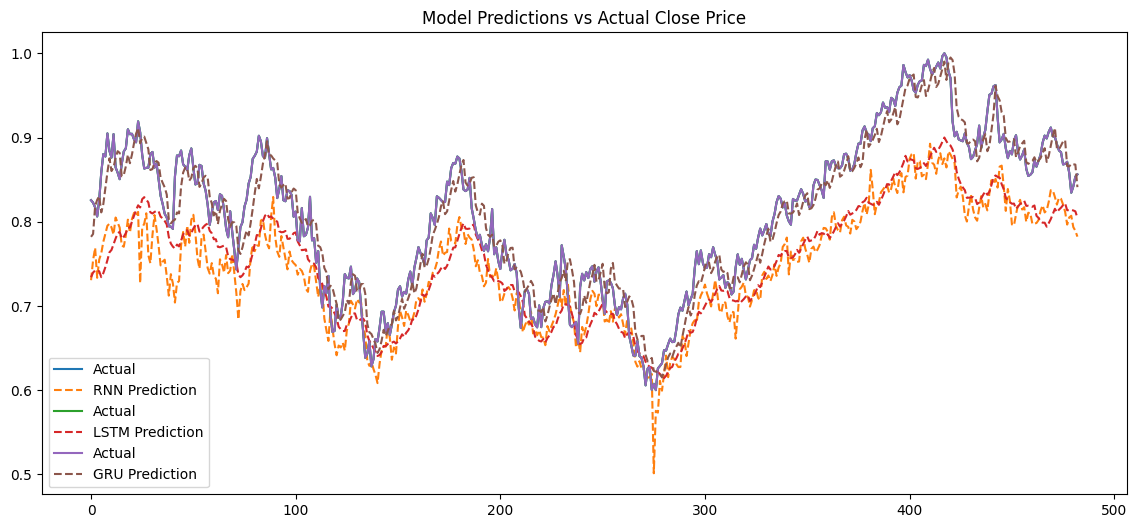

In [67]:
plt.figure(figsize=(14,6))
for m in models:
    y_pred = models[m].predict(X_test)
    plt.plot(y_test, label="Actual")
    plt.plot(y_pred, '--', label=f"{m} Prediction")
plt.title("Model Predictions vs Actual Close Price")
plt.legend()
plt.show()

In [68]:
baseline_results = {}

for m in ['RNN','LSTM','GRU']:
    y_pred = models[m].predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    baseline_results[m] = mae
    print(f"{m} Baseline MAE: {mae:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RNN Baseline MAE: 0.0610
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
LSTM Baseline MAE: 0.0551
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
GRU Baseline MAE: 0.0210


## 14. End-to-End Pipeline Components

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [70]:
# All numerical features
num_features = df_features.columns.tolist()

In [71]:
# Scaling pipeline
preprocessing_pipeline = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

In [72]:
# Full preprocessing pipeline
full_preprocess_pipeline = ColumnTransformer(
    transformers=[
        ("num", preprocessing_pipeline, num_features)
    ]
)

## 15. End-to-End Pipeline Functions

In [73]:
def sequence_pipeline_stage(data, seq_len=60, target_col="Close"):
    target_idx = num_features.index(target_col)
    X, y = [], []

    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i, target_idx])

    return np.array(X), np.array(y)

In [74]:
def full_end_to_end_pipeline(
    model_type,
    df_features,
    seq_len=60,
    epochs=30
):
    # --- Preprocessing ---
    scaled_data = full_preprocess_pipeline.fit_transform(df_features)

    # --- Sequence ---
    X, y = sequence_pipeline_stage(scaled_data, seq_len)

    # --- Split ---
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # --- Model ---
    model = keras_model_factory(
        model_type,
        (X_train.shape[1], X_train.shape[2])
    )

    # --- Train ---
    es = EarlyStopping(patience=5, restore_best_weights=True)
    model.fit(
        X_train,
        y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=32,
        callbacks=[es],
        verbose=0
    )

    # --- Evaluate ---
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

## 16. Train Models Using End-to-End Pipeline

In [75]:
pipeline_results = {}

for model_type in ["RNN", "LSTM", "GRU"]:
    mae = full_end_to_end_pipeline(
        model_type=model_type,
        df_features=df_features
    )
    pipeline_results[model_type] = mae
    print(f"Pipeline {model_type} MAE: {mae:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Pipeline RNN MAE: 0.0527


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Pipeline LSTM MAE: 0.0737


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Pipeline GRU MAE: 0.0258


## 17. Manual vs Pipeline Performance Comparison

In [76]:
comparison_df = pd.DataFrame({
    "Model": ["RNN", "LSTM", "GRU"],
    "Manual MAE": [
        baseline_results["RNN"],
        baseline_results["LSTM"],
        baseline_results["GRU"]
    ],
    "Pipeline MAE": [
        pipeline_results["RNN"],
        pipeline_results["LSTM"],
        pipeline_results["GRU"]
    ]
})

comparison_df

,Model,Manual MAE,Pipeline MAE
0,RNN,0.061047,0.052695
1,LSTM,0.055098,0.073690
2,GRU,0.021041,0.025771


## 18. Performance Comparison Visualization

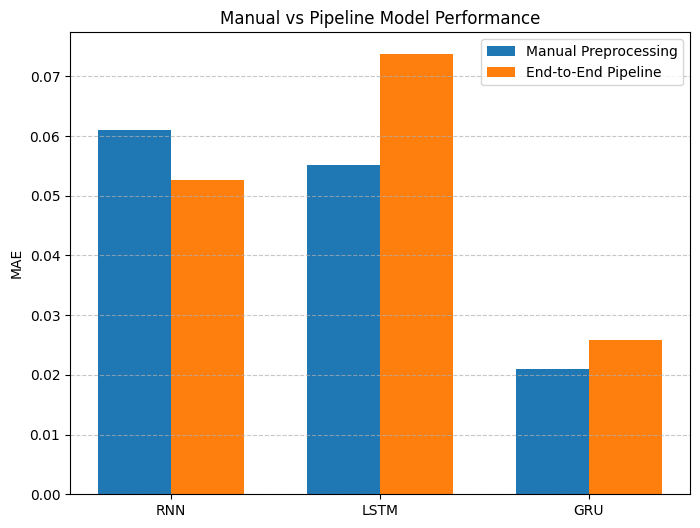

In [77]:
plt.figure(figsize=(8,6))

x = np.arange(len(comparison_df["Model"]))
width = 0.35

plt.bar(
    x - width/2,
    comparison_df["Manual MAE"],
    width,
    label="Manual Preprocessing"
)

plt.bar(
    x + width/2,
    comparison_df["Pipeline MAE"],
    width,
    label="End-to-End Pipeline"
)

plt.xticks(x, comparison_df["Model"])
plt.ylabel("MAE")
plt.title("Manual vs Pipeline Model Performance")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()